In [1]:
import pandas as pd # извлекаем панду  
import os # для работы с файлами
import re # для регулярных выражений
import seaborn as sns # для таблиц
from statannotations.Annotator import Annotator # считает достоверности
import matplotlib.pyplot as plt #для дизайна графиков
from itertools import combinations
import pandas as pd # извлекаем панду  
import os # для работы с файлами
import re # для регулярных выражений
import seaborn as sns # для таблиц
from statannotations.Annotator import Annotator # считает достоверности
import matplotlib.pyplot as plt #для дизайна графиков
from itertools import combinations
import javabridge
import bioformats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_dir = "C:\\Users\\Arteys\\Desktop\\Anya_work\\Insulin_Alexa_488_Glucagon_TexasRed" # ссылка на самую верхнюю папку
#Эта часть кода выводит название группы и образца из ссылки на таблицу
def path_to_group_name(dir_adress): # ссылка на таблицу
    index_list = []
    # print(dir_adress)
    for index,value in enumerate(dir_adress): # проходим все символы в ссылке
        if value == "/":
            index_list.append(index)
    
    index_group_start,index_group_end = index_list[-3],index_list[-2] # вручную смотрим на индексы и вписываем
    index_sample_start,index_sample_end = index_list[-2],index_list[-1] #

    group_name = dir_adress[index_group_start+1:index_group_end] # выводим символы  между слешами из ссылки
    sample_name = dir_adress[index_sample_start+1:index_sample_end] # 
    return group_name,sample_name 

In [3]:
#для одного образца создается таблица с нужными колонками 
def Get_data (correct_path,group_name,sample_name):
    islet_data_df_i = pd.read_csv(correct_path, encoding='cp1251') # читает csv как таблицу
    data_i = islet_data_df_i[['ImageNumber','AreaShape_Area', 'Children_Islet_nucleus_Count','Children_Object_Glucagon_wo_double_stain_Count',
                              'Children_Object_Insulin_Glucagon_Nuclei_Count',
                              'Children_Object_Insulin_wo_double_stain_Count']].copy() # берем  колонки из большой таблицы
    data_i['Group'] = group_name # добавили к колонкам data_i колонку "группа" и заполнили данными(название группы) 
    data_i['Sample'] = sample_name
   
    return(data_i)

In [4]:
#обрабатываем другую таблицу
def Get_data_2 (correct_path,group_name,sample_name):
    islet_data_df_i = pd.read_csv(correct_path, encoding='cp1251') # читает csv как таблицу
    data_i = islet_data_df_i[['ImageNumber','URL_Image']].copy() # берем  колонки из большой таблицы
    data_i['Group'] = group_name # добавили к колонкам data_i колонку "группа" и заполнили данными(название группы) 
    data_i['Sample'] = sample_name
   
    return(data_i)

In [5]:
empty_data = {'ImageNumber':[], 'AreaShape_Area':[], 'Children_Islet_nucleus_Count':[], 'Children_Object_Glucagon_wo_double_stain_Count':[], 
              'Children_Object_Insulin_Glucagon_Nuclei_Count' :[], 'Children_Object_Insulin_wo_double_stain_Count' :[],'Group':[],'Sample':[]} # это словарь. Заголовок и содержание
Number_of_nucleus_df = pd.DataFrame(empty_data) # из словаря сделали таблицу. пустая 

empty_data_2 = {'ImageNumber':[],'URL_Image':[],'Group':[],'Sample':[]} # это словарь. Заголовок и содержание
Number_of_nucleus_df_2 = pd.DataFrame(empty_data_2) # из словаря сделали таблицу. пустая 


In [6]:
#Берем нужный файл, применяем к нему функцию, которая делает таблицу с данными и добавляем эти данные в большую таблицу
for address, dirs, files in os.walk(path_dir): # выдает строку с адресом последней папки(address), название всех папок(dirs), название файлов
    for file in files:
        if ".csv" in str(file):
            full_path = os.path.join(address, file) # добавляет файл к адресу
            correct_path = full_path.replace("\\","/")
            group_name,sample_name = path_to_group_name(correct_path)


            if "MyExpt_Islets" in str(file):
                # print(group_name,sample_name)
                Result = Get_data(correct_path,group_name,sample_name)# из таблицы MyExpt_Islet вытаскиваем нужные данные для каждого образца 
                
                Number_of_nucleus_df = pd.concat([Number_of_nucleus_df,Result],axis=0) # добавляем данные для каждого образца в общую пустую таблицу
        
            if "MyExpt_Image" in str(file):
                # print(group_name,sample_name)
                Result = Get_data_2(correct_path,group_name,sample_name)# из таблицы MyExpt_Image вытаскиваем нужные данные для каждого образца 
                
                Number_of_nucleus_df_2 = pd.concat([Number_of_nucleus_df_2,Result],axis=0) # добавляем данные для каждого образца в общую пустую таблицу     

In [7]:
Number_of_nucleus_df = Number_of_nucleus_df.rename(columns={'AreaShape_Area':'Area,px','Children_Islet_nucleus_Count':'Nucleus_all',
                                                             'Children_Object_Glucagon_wo_double_stain_Count':'Glucagon',  
                                                             'Children_Object_Insulin_Glucagon_Nuclei_Count': 'Insulin_Glucagon',
                                                              'Children_Object_Insulin_wo_double_stain_Count':'Insulin' })


# Number_of_nucleus_df['Glucagon_part'] = Number_of_nucleus_df['Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100
# Number_of_nucleus_df['Insulin_part'] = Number_of_nucleus_df['Insulin'] / Number_of_nucleus_df['Nucleus_all'] *100
# Number_of_nucleus_df['Insulin_Glucagon_part'] = Number_of_nucleus_df['Insulin_Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100

#print(Number_of_nucleus_df, Number_of_nucleus_df_2)

#Соединяем таблицы по общим столбцам
Number_of_nucleus_df_2['URL_Image'] = Number_of_nucleus_df_2['URL_Image'].str.replace('file:///', '') #для того, чтобы значения в столбцах двух таблиц были одинаковыми

merged_table = pd.merge(Number_of_nucleus_df, Number_of_nucleus_df_2, on=['ImageNumber', 'Group', 'Sample'])

micrometers = pd.read_csv('C:\\Users\\Arteys\\Desktop\\Anya_work\\micrometers.csv')

# переименование столбца
micrometers = micrometers.rename(columns={'PathName_Image': 'URL_Image'})

# сохранение измененной таблицы 
micrometers.to_csv('C:\\Users\\Arteys\\Desktop\\Anya_work\\micrometers.csv', index=False)
micrometers.to_excel('C:\\Users\\Arteys\\Desktop\\Anya_work\\micrometers.xlsx', index=False)

#делаем одинаковые значения в столбце с адресом, по которому объединяем две таблицы
from urllib.parse import unquote

for i in range(len(merged_table)):
    merged_table['URL_Image'][i] = unquote(merged_table['URL_Image'][i].replace('/', '\\'))
    #print(merged_table['URL_Image'][i])
merged_table.to_excel('C:\\Users\\Arteys\\Desktop\\Anya_work\\merged_table.xlsx', index = False)          
#merged_table.to_excel('C:\\Users\\Arteys\\Desktop\\Anya_work\\merged_table.xlsx', index=False)
total_t = pd.merge(merged_table, micrometers[['URL_Image', 'size, micrometer']], on='URL_Image', how='left')


#вычисляем нужные параметры
total_t['islet_sqwere'] = total_t['Area,px']*total_t['size, micrometer']*total_t['size, micrometer']
total_t['Insulin_Glucagon cells per islet square, cells/um^2'] = total_t['Insulin_Glucagon']/total_t['islet_sqwere']
total_t['Insulin cells per islet square, cells/um^2'] = total_t['Insulin']/total_t['islet_sqwere']
total_t['Glucagon cells per islet square,cells/um^2'] = total_t['Glucagon']/total_t['islet_sqwere']
total_t['Cellularity, cells/um^2'] = total_t['Nucleus_all']/total_t['islet_sqwere']
print(total_t)
total_t.to_excel('C:\\Users\\Arteys\\Desktop\\Anya_work\\таблица с микрометрами3.xlsx', index=False)

C:\Users\Arteys\AppData\Local\Temp\ipykernel_5820\542594557.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table['URL_Image'][i] = unquote(merged_table['URL_Image'][i].replace('/', '\\'))


     ImageNumber    Area,px  Nucleus_all  Glucagon  Insulin_Glucagon  Insulin  \
0            1.0  1015074.0       1145.0     144.0             229.0    910.0   
1            2.0   297027.0        279.0      46.0              49.0    221.0   
2            3.0   622050.0        776.0      86.0             133.0    512.0   
3            4.0   199684.0        241.0      48.0              57.0    186.0   
4            5.0   156537.0        223.0      44.0              89.0    147.0   
..           ...        ...          ...       ...               ...      ...   
151         11.0    89191.0         50.0       3.0               0.0     37.0   
152          1.0    13845.0         12.0       3.0               3.0      7.0   
153          2.0    26803.0         28.0       9.0               8.0     17.0   
154          3.0    17155.0         20.0      14.0               2.0      2.0   
155          4.0    82672.0        130.0      54.0              54.0     72.0   

       Group Sample        

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

30_days vs. 60_days: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.246e-01 Stat=1.241e-01
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.355e-02 Stat=6.095e+00
Intact vs. STZ-AFG: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.714e-03 Stat=7.638e+00
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.430e-03 Stat=6.740e+00
60_days vs. STZ-AFG: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.449e-01 Stat=1.059e-01
30_days vs. STZ-AFG: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.453e-01 Stat=3.807e-02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-0

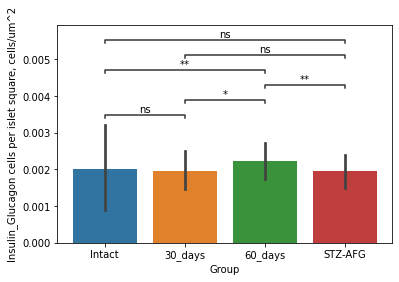

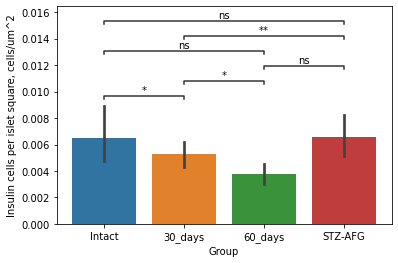

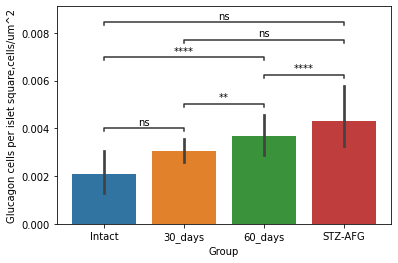

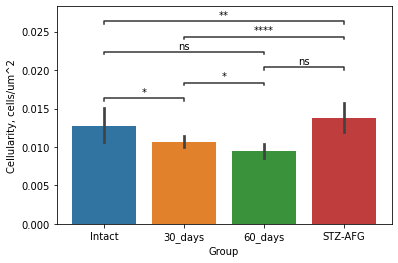

In [8]:
#Статистика
unique_group= Number_of_nucleus_df['Group'].unique() # достаем уникальные названия групп. unique() выдает список
pairs_1 = []
# print(unique_group)

for group1, group2 in combinations(unique_group, 2):
    pairs_1.append(((group1),(group2)))
    # print(pairs_1)

def function_statistic(data, column):
    fig, axs = plt.subplots()
    sns.barplot(data = data, x = 'Group', y = column, order = ["Intact","30_days","60_days","STZ-AFG"])

    annotator = Annotator(axs, pairs_1, data=data, x = 'Group', y = column)
    annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

    annotator.apply_and_annotate()

# function_statistic(total_t,'Glucagon_part')
# function_statistic(total_t,'Insulin_part')
# function_statistic(total_t,'Insulin_Glucagon_part')
# function_statistic(total_t,'Ins_Gluc_part_from_insulin')
# function_statistic(total_t,'Ins_Gluc_part_from_glucagon')

function_statistic(total_t,'Insulin_Glucagon cells per islet square, cells/um^2')
function_statistic(total_t,'Insulin cells per islet square, cells/um^2')
function_statistic(total_t,'Glucagon cells per islet square,cells/um^2')
function_statistic(total_t,'Cellularity, cells/um^2')

#plt.style.use('dark_background')
plt.style.use('default')
plt.rcParams['figure.facecolor'] = (1, 1, 1)

#plt.savefig('myplot.png', transparent=False)
plt.show()